Starting visualization...



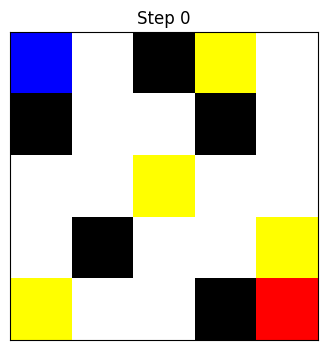

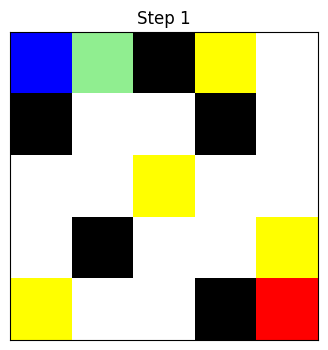

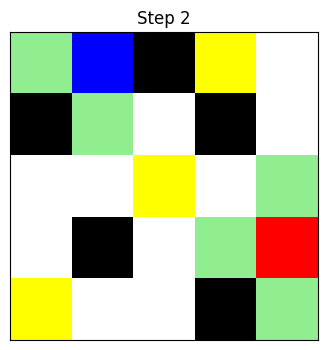

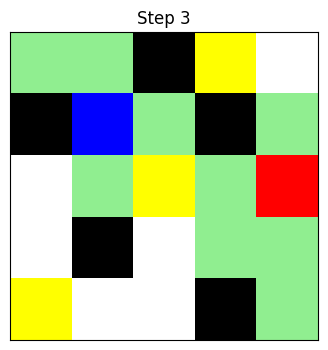

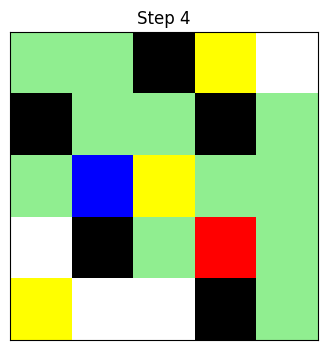

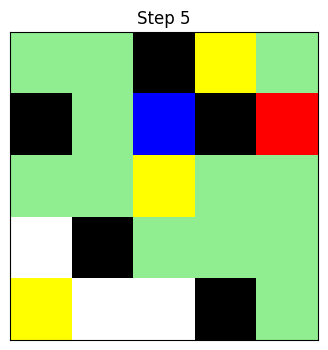

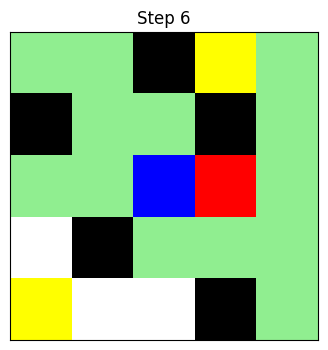

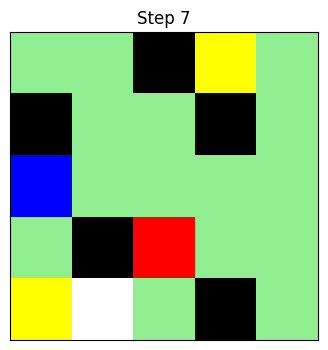

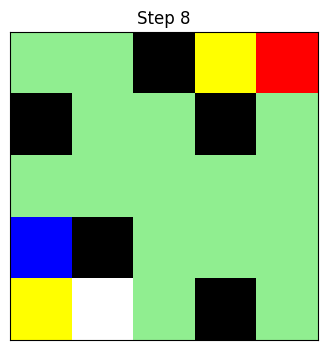

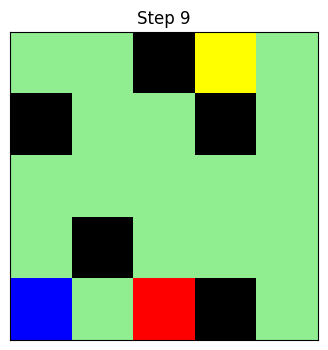

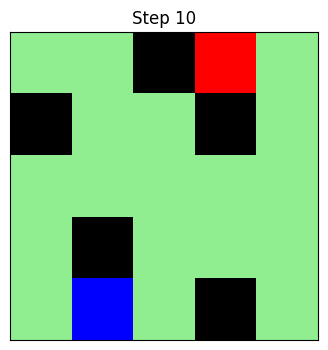

Agent 1 collected keys: [(2, 2), (4, 0)]
Agent 2 collected keys: [(3, 4), (0, 3)]

Done!


In [4]:
from collections import deque
import time
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

maze = [
    ['0','0','1','K','0'],
    ['1','0','0','1','0'],
    ['0','0','K','0','0'],
    ['0','1','0','0','K'],
    ['K','0','0','1','0']
]

ROWS = len(maze)
COLS = len(maze[0])

A1_START = (0, 0)
A2_START = (4, 4)

DIR = [(1,0), (-1,0), (0,1), (0,-1)]


def draw_graph(a1, a2, visited, step):
    # simple numeric grid
    grid = np.zeros((ROWS, COLS), dtype=int)

    for r in range(ROWS):
        for c in range(COLS):
            if maze[r][c] == '1':
                grid[r][c] = 0   # wall
            else:
                grid[r][c] = 1   # free

            if (r, c) in visited:
                grid[r][c] = 2   # visited

            if maze[r][c] == 'K':
                grid[r][c] = 3   # key

    # agent positions
    ar, ac = a1
    br, bc = a2
    grid[ar][ac] = 4
    grid[br][bc] = 5

    # simple colormap
    cmap = ListedColormap([
        'black',       # 0 wall
        'white',       # 1 free
        'lightgreen',  # 2 visited
        'yellow',      # 3 key
        'blue',        # 4 agent 1
        'red'          # 5 agent 2
    ])

    plt.figure(figsize=(4, 4))
    plt.imshow(grid, cmap=cmap, vmin=0, vmax=5)
    plt.title(f"Step {step}")
    plt.xticks([]); plt.yticks([])
    plt.show(block=False)
    plt.pause(0.2)

# -------------------------------------------------------------------
# print_maze function
# -------------------------------------------------------------------
def print_maze(a1, a2):
    os.system('cls' if os.name == 'nt' else 'clear')
    for r in range(ROWS):
        row = ""
        for c in range(COLS):
            if (r, c) == a1:
                row += "A "
            elif (r, c) == a2:
                row += "B "
            else:
                row += maze[r][c] + " "
        print(row)
    print()
    time.sleep(0.25)

# -------------------------------------------------------------------
# BFS logic
# -------------------------------------------------------------------
def dual_bfs():
    q1 = deque([A1_START])
    q2 = deque([A2_START])

    visited_global = {A1_START, A2_START}

    keys_a1 = []
    keys_a2 = []

    pos_a1 = A1_START
    pos_a2 = A2_START

    print("Starting visualization...\n")

    step = 0
    draw_graph(pos_a1, pos_a2, visited_global, step)

    while q1 or q2:
        step += 1

        # ---------- Agent 1 ----------
        if q1:
            r, c = q1.popleft()
            pos_a1 = (r, c)

            if maze[r][c] == 'K':
                keys_a1.append((r, c))
                maze[r][c] = '0'

            for dr, dc in DIR:
                nr, nc = r + dr, c + dc
                if (0 <= nr < ROWS and 0 <= nc < COLS and
                    maze[nr][nc] != '1' and (nr, nc) not in visited_global):

                    visited_global.add((nr, nc))
                    q1.append((nr, nc))

        # ---------- Agent 2 ----------
        if q2:
            r, c = q2.popleft()
            pos_a2 = (r, c)

            if maze[r][c] == 'K':
                keys_a2.append((r, c))
                maze[r][c] = '0'

            for dr, dc in DIR:
                nr, nc = r + dr, c + dc
                if (0 <= nr < ROWS and 0 <= nc < COLS and
                    maze[nr][nc] != '1' and (nr, nc) not in visited_global):

                    visited_global.add((nr, nc))
                    q2.append((nr, nc))

        # NEW: separate figure per step
        draw_graph(pos_a1, pos_a2, visited_global, step)

    return keys_a1, keys_a2

# Run
keys1, keys2 = dual_bfs()
print("Agent 1 collected keys:", keys1)
print("Agent 2 collected keys:", keys2)
print("\nDone!")
